### Importing The Packages

In [111]:
import pandas as pd
import numpy as np

import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

sns.set()

### Data Import

In [2]:
pune_House=pd.read_csv("Pune_House_Data.csv")

### Data Inspection

In [3]:
pune_House.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh


In [4]:
pune_House.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


In [5]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 13320 | Number of columns are: 9


In [6]:
pune_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Exploratory Data Analysis (EDA)

#### Checking Duplicate Records

In [7]:
print("Number of duplicate records:",(pune_House.duplicated()).sum())

Number of duplicate records: 13


#### Removing Duplicate Records

In [8]:
pune_House.drop_duplicates(keep='first')

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


### Pandas Profiling

In [9]:
pandas_profiling.ProfileReport(pune_House,True)

### Observations
- Society has high missing values so it can be removed 
- Site Location has 90 unique values


In [10]:
pune_House.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh


### Five Point Summary

In [11]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
pune_House.describe()

,bath,balcony,price
count,13247.000,12711.000,13320.000
mean,2.693,1.584,112.566
std,1.341,0.817,148.972
min,1.000,0.000,8.000
25%,2.000,1.000,50.000
50%,2.000,2.000,72.000
75%,3.000,2.000,120.000
max,40.000,3.000,3600.000


### Observations
- 40 bathrooms seems to be unreal so it needs to be rectified 
- 8 lakh price seems to be very low for Pune

### Area Type

#### Value Counts

In [12]:
pune_House.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

#### Count Plot

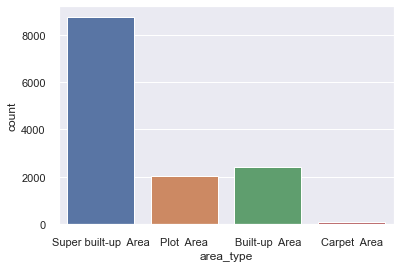

In [13]:
sns.countplot(data=pune_House,x="area_type")
plt.show()

#### Proportion Wise

In [14]:
pd.crosstab(index=pune_House.area_type,columns="count",normalize=True)

col_0,count
area_type,
Built-up Area,0.182
Carpet Area,0.007
Plot Area,0.152
Super built-up Area,0.660


#### Effect on Price

#### Catplot

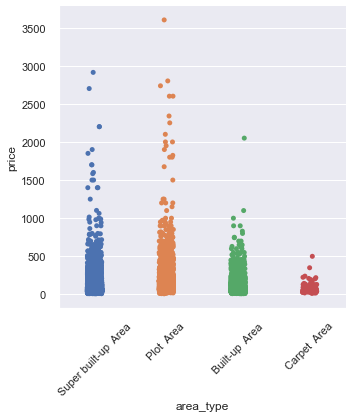

In [15]:
sns.catplot(x="area_type",y="price",data=pune_House)
plt.xticks(rotation =45)
plt.show()

#### Boxplot

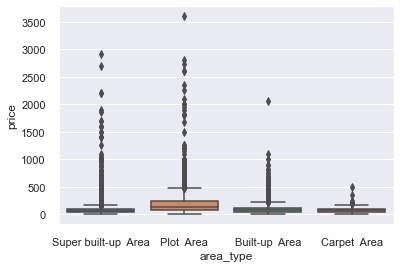

In [16]:
sns.boxplot(data=pune_House,x="area_type",y="price")
plt.show()

### Availability
- As it has high cardinality so we can transform it 

In [17]:
pune_House.availability=pune_House.availability.apply(lambda x:  "Ready To Move" if (x== "Ready To Move" or x=="Immediate Possession") else x.split("-")[1] )

#### Value Counts

In [18]:
pune_House.availability.value_counts()

Ready To Move    10597
Dec                728
May                338
Apr                298
Aug                249
Mar                246
Jul                206
Jun                200
Jan                126
Oct                 91
Sep                 87
Nov                 79
Feb                 75
Name: availability, dtype: int64

#### Count Plot

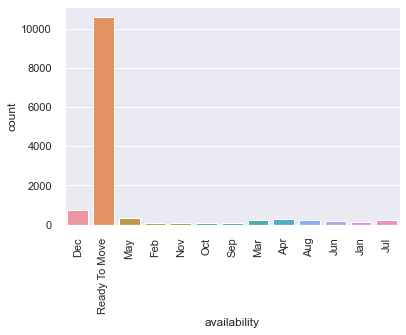

In [19]:
sns.countplot(data=pune_House,x="availability")
plt.xticks(rotation=90)
plt.show()

#### Proportion Wise

In [20]:
pd.crosstab(columns=pune_House.availability,index="count",normalize=True)

availability,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
row_0,,,,,,,,,,,,,
count,0.022,0.019,0.055,0.006,0.009,0.015,0.015,0.018,0.025,0.006,0.007,0.796,0.007


#### Effect on Price

#### Catplot

<Figure size 1080x1080 with 0 Axes>

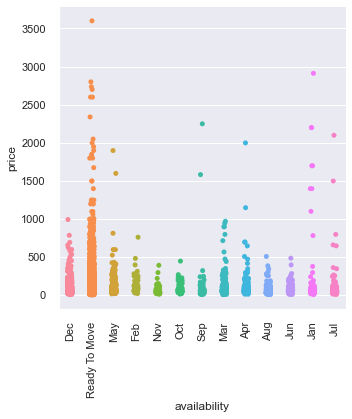

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(x="availability",y="price",data=pune_House)
plt.xticks(rotation=90)
plt.show()

#### Boxplot

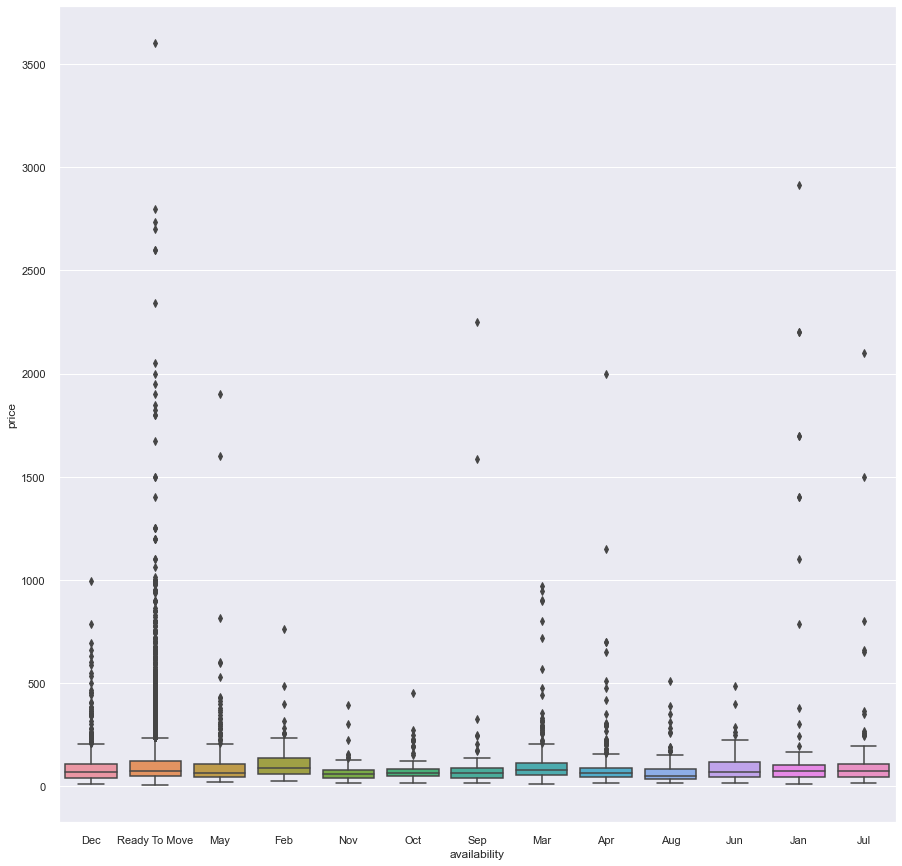

In [22]:
plt.figure(figsize=(15,15))
sns.boxplot(x="availability",y="price",data=pune_House)

### Size 
- Size can be transformed by extracting the number of bedrooms

#### Renaming the size variable as Size 

In [23]:
pune_House.rename(columns={'size':"Size"},inplace=True)

In [24]:
pune_House.Size=pune_House.Size.apply(lambda x : str(x).split(" ")[0])

#### Value Counts

In [25]:
pune_House.Size.value_counts()

2      5528
3      4857
4      1417
1       656
5       356
6       221
7       100
8        89
9        54
nan      16
10       14
11        4
14        1
13        1
18        1
43        1
27        1
12        1
16        1
19        1
Name: Size, dtype: int64

#### There are some records with nan so we can treat them as missing values

In [26]:
pune_House.Size[pune_House.Size=="nan"]=np.NaN

#### Imputing Size with it's median 

In [27]:
pune_House.Size.fillna(pune_House.Size.median(),inplace=True)

#### Countplot

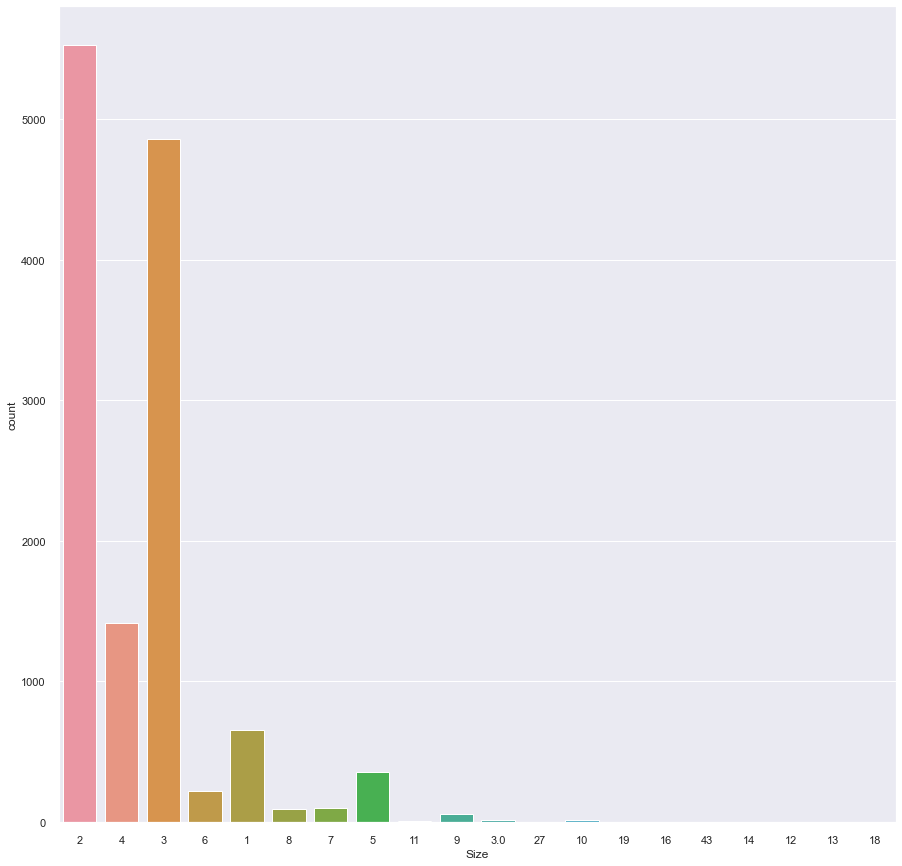

In [28]:
plt.figure(figsize=(15,15))
sns.countplot(x="Size",data=pune_House)

#### We can see that 3 and 3.0 are coming separately so convert Size type to integer

In [29]:
pune_House.Size=pune_House.Size.astype("int")

#### Countplot

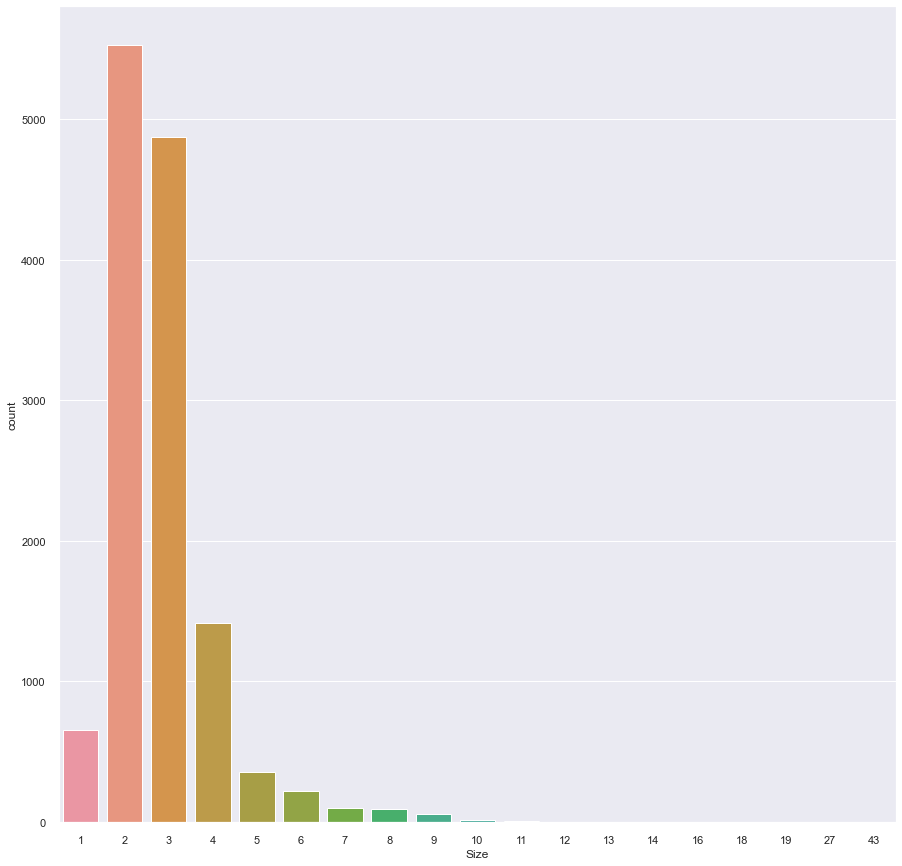

In [30]:
plt.figure(figsize=(15,15))
sns.countplot(x="Size",data=pune_House)
plt.show()

#### Proportion Wise

In [31]:
pd.crosstab(columns=pune_House.Size,index="count",normalize=True)

Size,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,27,43
row_0,,,,,,,,,,,,,,,,,,,
count,0.049,0.415,0.366,0.106,0.027,0.017,0.008,0.007,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### Effect on Price

#### Catplot

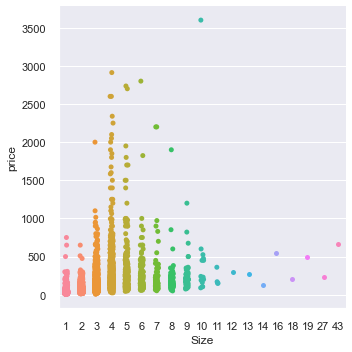

In [32]:
sns.catplot(x="Size",y="price",data=pune_House)
plt.show()

#### Boxplot

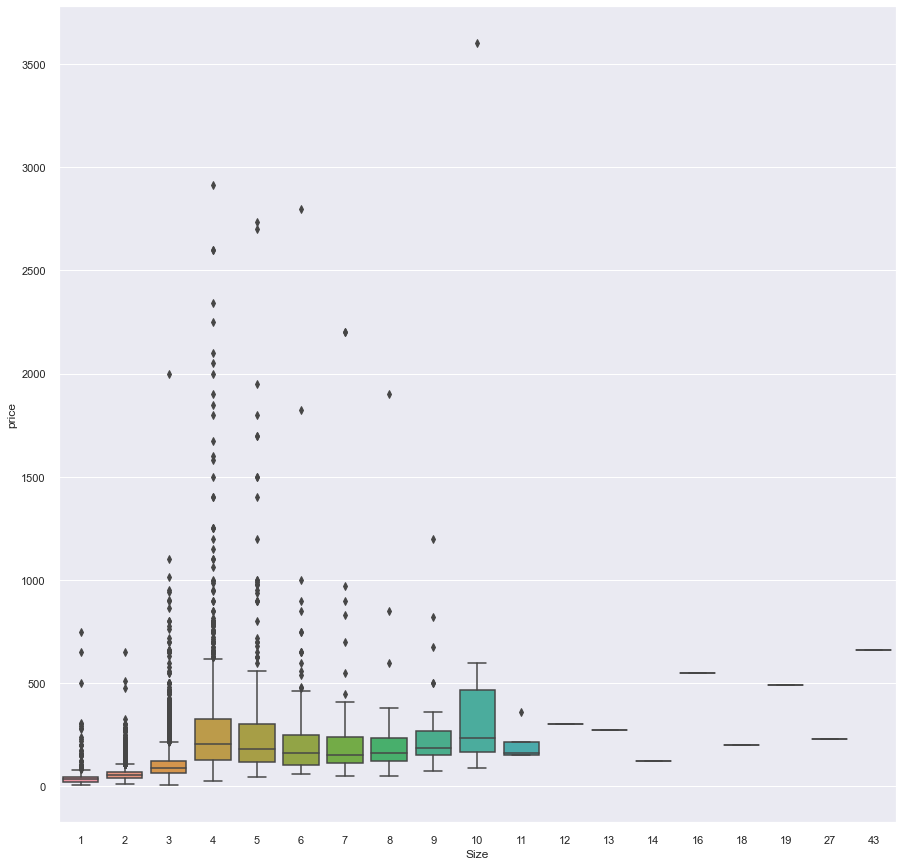

In [33]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Size",y="price",data=pune_House)

#### Observations
- Size > 11 needs to be checked as they are only single values present

### Total Sqft

#### UDF to check where total sqft has non float values

In [34]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
pune_House[~pune_House.total_sqft.apply(lambda x: isFloat(x))]

,area_type,availability,Size,society,total_sqft,bath,balcony,price,site_location
30,Super built-up Area,Dec,4,LedorSa,2100 - 2850,4.000,0.000,186.000,Gultekdi
56,Built-up Area,Feb,4,BrereAt,3010 - 3410,nan,nan,192.000,Model colony
81,Built-up Area,Oct,4,Gollela,2957 - 3450,nan,nan,224.500,Shukrawar Peth
122,Super built-up Area,Mar,4,SNontle,3067 - 8156,4.000,0.000,477.000,Ganeshkhind
137,Super built-up Area,Mar,2,Vaarech,1042 - 1105,2.000,0.000,54.005,Khadaki
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,May,3,Sodgere,1804 - 2273,3.000,0.000,122.000,Gokhale Nagar
13059,Super built-up Area,Ready To Move,2,Shodsir,1200 - 1470,2.000,0.000,72.760,Anandnagar
13240,Super built-up Area,Ready To Move,1,Pardsri,1020 - 1130,nan,nan,52.570,Vadgaon Budruk
13265,Super built-up Area,Sep,2,Ranuetz,1133 - 1384,2.000,0.000,59.135,Dapodi


#### Transforming the total sqft values 

In [36]:
def func(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [37]:
pune_House.total_sqft=pune_House.total_sqft.apply(lambda  x: func(x))

### Distribution Plot

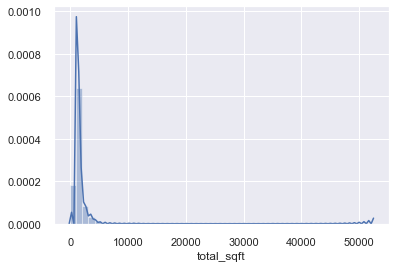

In [38]:
sns.distplot(pune_House.total_sqft.dropna())
plt.show()

### Scatter Plot

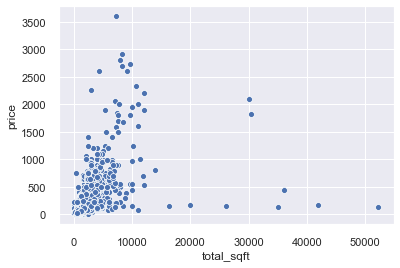

In [39]:
sns.scatterplot(x=pune_House.total_sqft,y=pune_House.price)
plt.show()

### Regression Plot

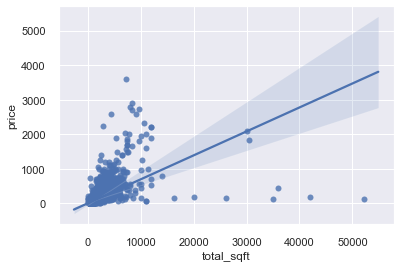

In [40]:
sns.regplot(x=pune_House.total_sqft,y=pune_House.price)
plt.show()

### Dropping Society Column due to high missing values 

In [41]:
pune_House=pune_House.loc[:,pune_House.columns.difference(["society"])]

In [42]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft
0,2,Super built-up Area,Dec,1.000,2.000,39.070,Alandi Road,1056.000
1,4,Plot Area,Ready To Move,3.000,5.000,120.000,Ambegaon Budruk,2600.000
2,3,Built-up Area,Ready To Move,3.000,2.000,62.000,Anandnagar,1440.000
3,3,Super built-up Area,Ready To Move,1.000,3.000,95.000,Aundh,1521.000
4,2,Super built-up Area,Ready To Move,1.000,2.000,51.000,Aundh,1200.000


### Balcony

#### Value Counts

In [43]:
pune_House.balcony.value_counts()

2.000    5113
1.000    4897
3.000    1672
0.000    1029
Name: balcony, dtype: int64

#### Countplot

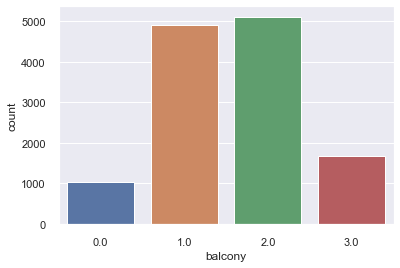

In [44]:
sns.countplot(data=pune_House,x="balcony")
plt.show()

#### Proportion Wise

In [45]:
pd.crosstab(index=pune_House.balcony,columns="count",normalize=True)

col_0,count
balcony,
0.000,0.081
1.000,0.385
2.000,0.402
3.000,0.132


### Effect on Price

#### Catplot

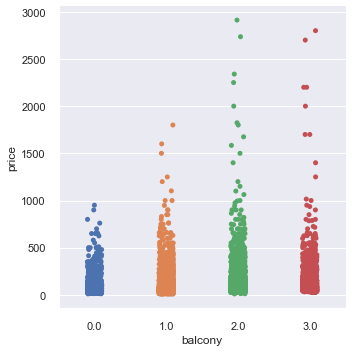

In [46]:
sns.catplot(data=pune_House,x="balcony",y="price")
plt.show()

#### Boxplot

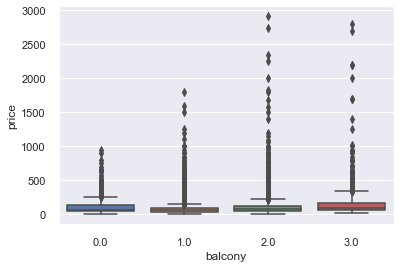

In [47]:
sns.boxplot(data=pune_House,x="balcony",y="price")
plt.show()

### Bath

#### Value Counts

In [48]:
pune_House.bath.value_counts().sort_index(ascending=False)

40.000       1
27.000       1
18.000       1
16.000       2
15.000       1
14.000       1
13.000       3
12.000       7
11.000       3
10.000      13
9.000       43
8.000       64
7.000      102
6.000      273
5.000      524
4.000     1226
3.000     3286
2.000     6908
1.000      788
Name: bath, dtype: int64

#### Countplot

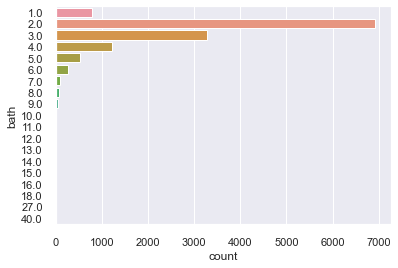

In [49]:
sns.countplot(data=pune_House,y="bath")
plt.show()

#### Proportion Wise

In [50]:
pd.crosstab(columns=pune_House.bath,index="count",normalize=True)

bath,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,18.000,27.000,40.000
row_0,,,,,,,,,,,,,,,,,,,
count,0.059,0.521,0.248,0.093,0.040,0.021,0.008,0.005,0.003,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### Effect on Price

#### Catplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

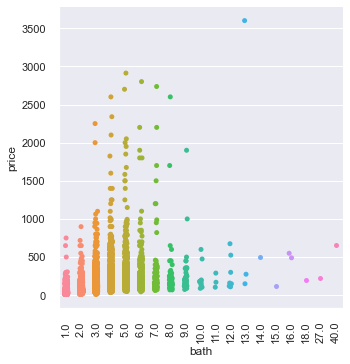

In [51]:
sns.catplot(data=pune_House,x="bath",y="price")
plt.xticks(rotation=90)

#### Boxplot

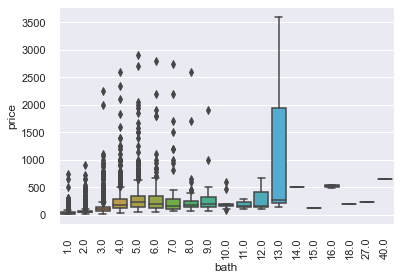

In [52]:
sns.boxplot(data=pune_House,x="bath",y="price")
plt.xticks(rotation=90)
plt.show()

### Site Location 

#### Value Counts

In [53]:
pune_House.site_location.value_counts()

Kondhwa          417
Karve Nagar      278
Khadaki          278
Aundh            278
Baner            278
                ... 
Somwar Peth      138
Tilak Road       138
Ghorpadi         138
Sadashiv Peth    138
other              1
Name: site_location, Length: 90, dtype: int64

#### Countplot

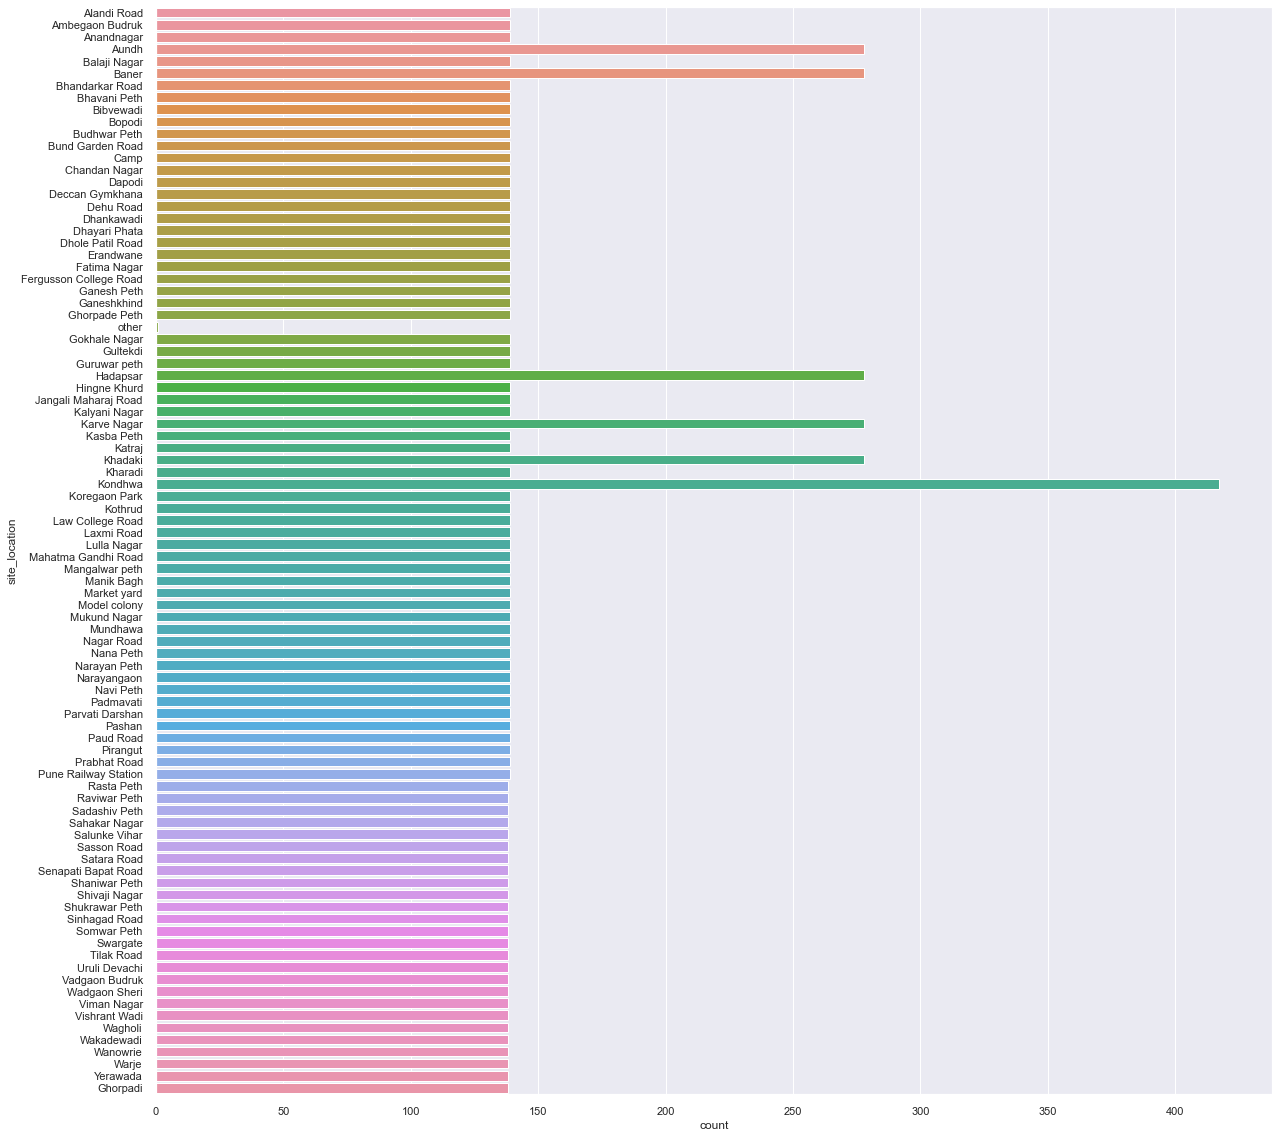

In [54]:
plt.figure(figsize=(20,20))
sns.countplot(data=pune_House,y="site_location")
plt.show()

#### Proportion Wise

In [55]:
pd.crosstab(columns=pune_House.site_location,index="count",normalize=True)

site_location,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Balaji Nagar,Baner,Bhandarkar Road,Bhavani Peth,Bibvewadi,Bopodi,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
row_0,,,,,,,,,,,,,,,,,,,,,
count,0.010,0.010,0.010,0.021,0.010,0.021,0.010,0.010,0.010,0.010,...,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.000


### Effect on Price

#### Catplot

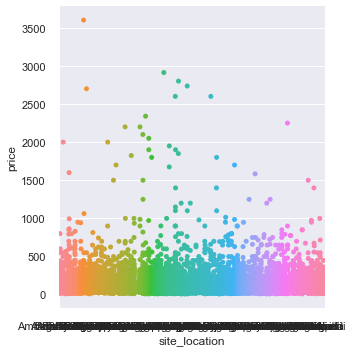

In [56]:
sns.catplot(data=pune_House,x="site_location",y="price")
plt.show()

#### Boxplot

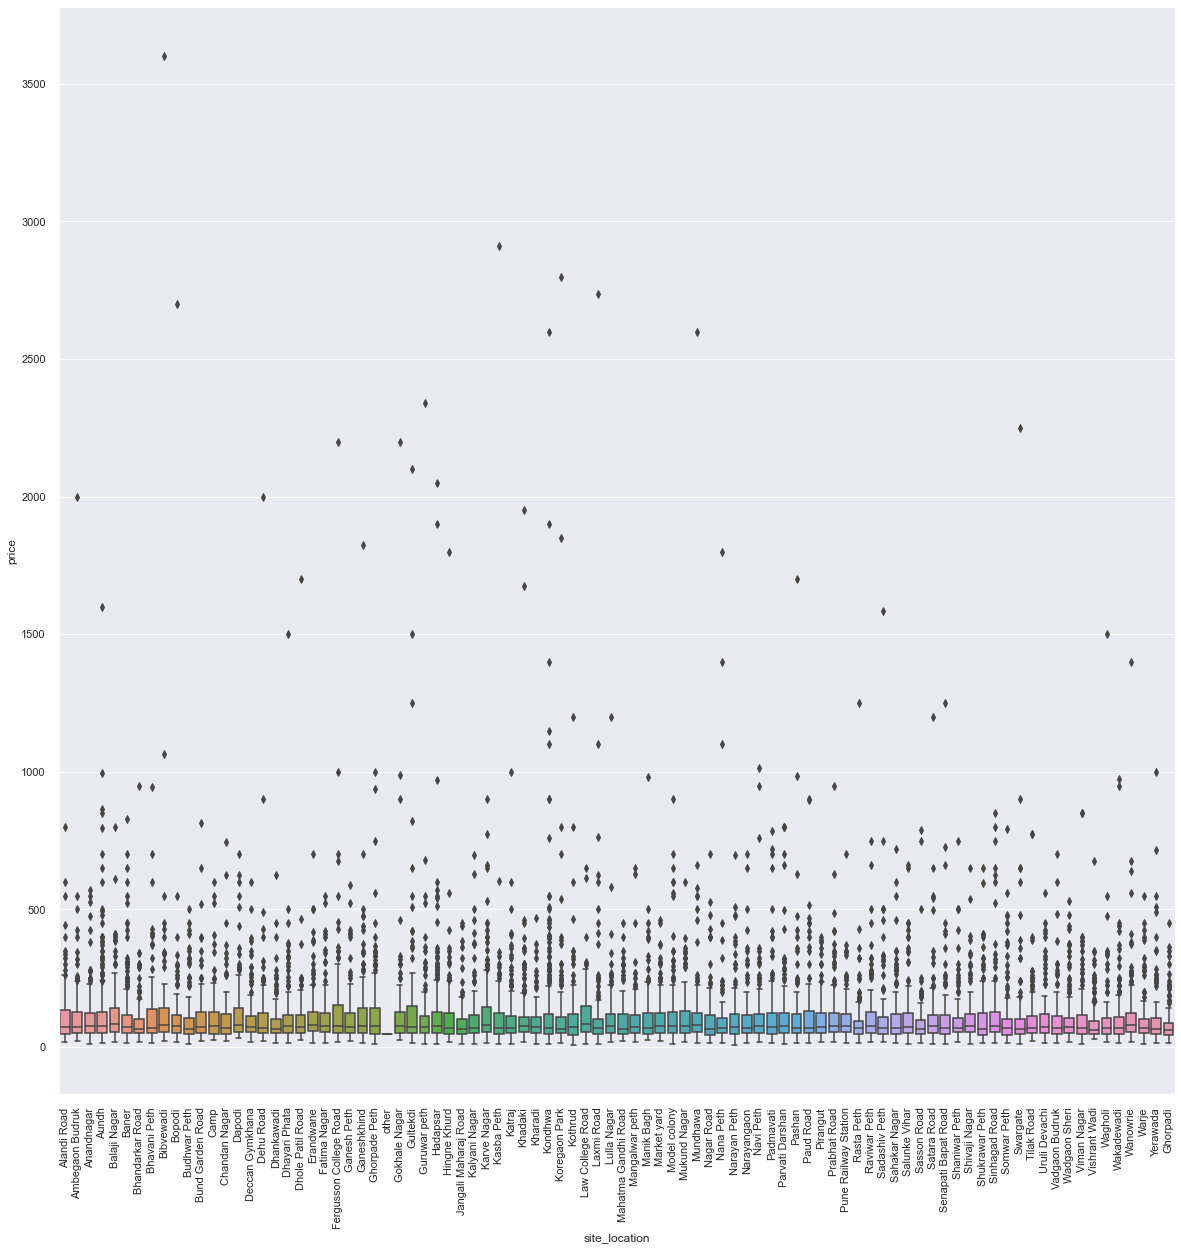

In [57]:
plt.figure(figsize=(20,20))
sns.boxplot(data=pune_House,x="site_location",y="price")
plt.xticks(rotation=90)
plt.show()

### Price

#### Distribution Plot

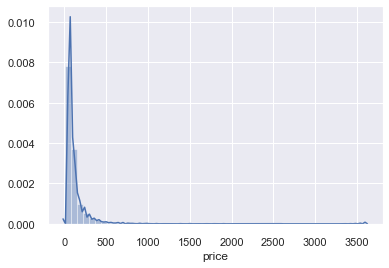

In [58]:
sns.distplot(pune_House.price)
plt.show()

### Removing Unrealistic Data

#### Removing rows where bathrooms are greater than number of rooms including hall

In [59]:
pune_House=pune_House[~(pune_House.bath>pune_House.Size+1)]

#### Removing rows where bathrooms are less than number of rooms including hall-2

In [60]:
pune_House=pune_House[~(pune_House.bath<pune_House.Size-2)]

In [61]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 13095 | Number of columns are: 8


#### Removing rows where balcony are greater than number of rooms including hall

In [62]:
pune_House=pune_House[~(pune_House.balcony>(pune_House.Size+1))]

In [63]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 13093 | Number of columns are: 8


#### Removing rows where balcony is less than number of rooms including hall-3

In [64]:
pune_House=pune_House[~(pune_House.balcony<pune_House.Size-3)]

In [65]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 12527 | Number of columns are: 8


#### Creating New Column as Sqftbysize which is Sqft/Size

In [66]:
pune_House["sqftbysize"]=pune_House.total_sqft/pune_House.Size

#### Five Point Summary

In [67]:
pune_House.sqftbysize.describe()

count   12485.000
mean      580.339
std       384.975
min         0.250
25%       483.333
50%       556.560
75%       625.000
max     26136.000
Name: sqftbysize, dtype: float64

#### Average size of a room including hall is 300 sqft, hence removing records which have area less than 250 sqft

In [68]:
pune_House=pune_House[~(pune_House.sqftbysize<=250)]

In [69]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 12176 | Number of columns are: 9


#### Creating New Column as pricesqft which is (Price*100000)/total Sqft

In [70]:
pune_House["pricesqft"]=(pune_House.price*100000)/pune_House.total_sqft

#### Five Point Summary

In [71]:
pune_House.pricesqft.describe()

count    12134.000
mean      6177.206
std       3895.066
min        267.830
25%       4198.980
50%       5259.055
75%       6810.043
max     176470.588
Name: pricesqft, dtype: float64

#### Average Price per sqft in Pune is Rs. 3500/sqft, hence removing records which have less than Rs. 3000/sqft

In [72]:
pune_House=pune_House[~(pune_House.pricesqft<=3000)]

In [73]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 11595 | Number of columns are: 10


### Removing Outliers in Price

In [74]:
pune_House=pune_House[~(pune_House.pricesqft>=pune_House.pricesqft.mean()+pune_House.pricesqft.std())]

In [75]:
pune_House=pune_House[~(pune_House.pricesqft<=pune_House.pricesqft.mean()-pune_House.pricesqft.std())]

In [76]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 8919 | Number of columns are: 10


#### Few records have 4 or more rooms with 0 balcony which seems to be unreal hence removing them

In [77]:
pune_House=pune_House.loc[~((pune_House.balcony==0) & (pune_House.Size>=4))]

In [78]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 8919 | Number of columns are: 10


### Checking Missing Values

In [79]:
pune_House.isnull().sum()

Size               0
area_type          0
availability       0
balcony          326
bath              54
price              0
site_location      0
total_sqft        42
sqftbysize        42
pricesqft         42
dtype: int64

### Deleting the records with missing values as they are less number

In [80]:
pune_House=pune_House.dropna(axis=0)

### Rechecking the Missing Values

In [81]:
pune_House.isnull().sum()

Size             0
area_type        0
availability     0
balcony          0
bath             0
price            0
site_location    0
total_sqft       0
sqftbysize       0
pricesqft        0
dtype: int64

In [82]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft,sqftbysize,pricesqft
1,4,Plot Area,Ready To Move,3.000,5.000,120.000,Ambegaon Budruk,2600.000,650.000,4615.385
2,3,Built-up Area,Ready To Move,3.000,2.000,62.000,Anandnagar,1440.000,480.000,4305.556
3,3,Super built-up Area,Ready To Move,1.000,3.000,95.000,Aundh,1521.000,507.000,6245.891
4,2,Super built-up Area,Ready To Move,1.000,2.000,51.000,Aundh,1200.000,600.000,4250.000
8,3,Super built-up Area,Ready To Move,1.000,3.000,63.250,Bhandarkar Road,1310.000,436.667,4828.244


### Removing the unnecessary columns

In [83]:
pune_House.drop(columns=["sqftbysize","pricesqft"],inplace=True)

In [84]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft
1,4,Plot Area,Ready To Move,3.000,5.000,120.000,Ambegaon Budruk,2600.000
2,3,Built-up Area,Ready To Move,3.000,2.000,62.000,Anandnagar,1440.000
3,3,Super built-up Area,Ready To Move,1.000,3.000,95.000,Aundh,1521.000
4,2,Super built-up Area,Ready To Move,1.000,2.000,51.000,Aundh,1200.000
8,3,Super built-up Area,Ready To Move,1.000,3.000,63.250,Bhandarkar Road,1310.000


### Distribution Plot of Price

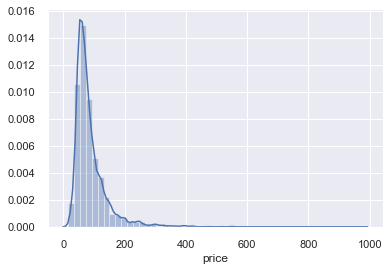

Skewness: 3.39


In [85]:
sns.distplot(pune_House.price)
plt.show()
print("Skewness:",np.round(pune_House.price.skew(),2))

### Creating Logarithmic Price so as to reduce skewness

In [86]:
pune_House["ln_price"]=np.log(pune_House.price)

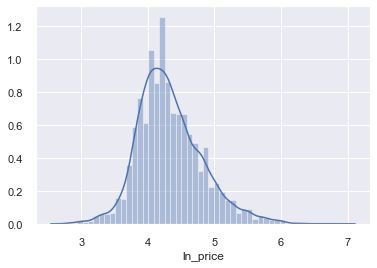

Skewness: 0.63


In [87]:
sns.distplot(pune_House.ln_price)
plt.show()
print("Skewness:",np.round(pune_House.ln_price.skew(),2))

### Correlation Check

#### Spearman

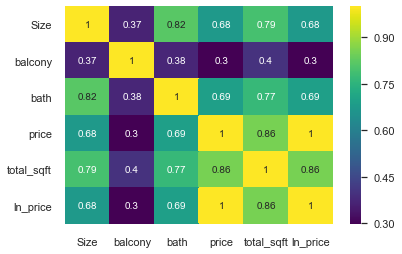

In [88]:
sns.heatmap(pune_House.corr("spearman"),annot=True,cmap="viridis")
plt.show()

#### Pearson

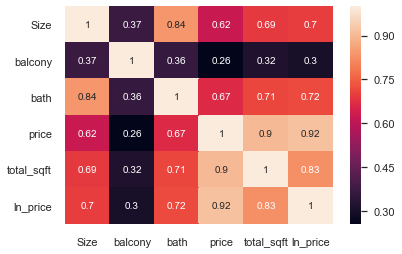

In [89]:
sns.heatmap(pune_House.corr(),annot=True)
plt.show()

In [90]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft,ln_price
1,4,Plot Area,Ready To Move,3.000,5.000,120.000,Ambegaon Budruk,2600.000,4.787
2,3,Built-up Area,Ready To Move,3.000,2.000,62.000,Anandnagar,1440.000,4.127
3,3,Super built-up Area,Ready To Move,1.000,3.000,95.000,Aundh,1521.000,4.554
4,2,Super built-up Area,Ready To Move,1.000,2.000,51.000,Aundh,1200.000,3.932
8,3,Super built-up Area,Ready To Move,1.000,3.000,63.250,Bhandarkar Road,1310.000,4.147


### Regression Plots with ln_Price

### UDF for Reg Plot

In [91]:
def reg_plot(x):
    sns.regplot(data=pune_House,x=x,y="ln_price")
    plt.show()

#### Size

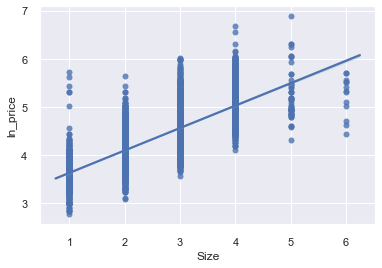

In [92]:
reg_plot(pune_House.Size)

#### Balcony

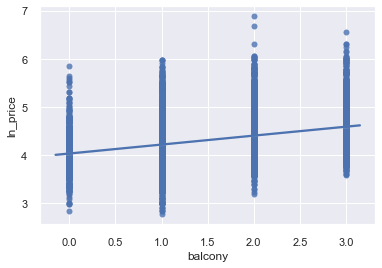

In [93]:
reg_plot(pune_House.balcony)

#### Bath

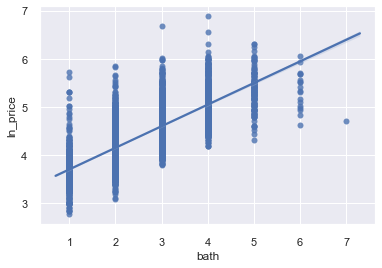

In [94]:
reg_plot(pune_House.bath)

#### Total_sqft

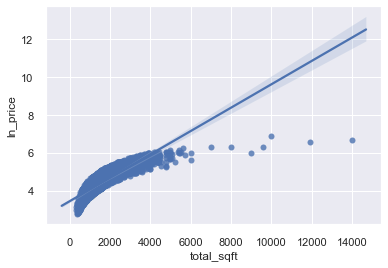

In [95]:
reg_plot(pune_House.total_sqft)

#### Checking with log of Total Sqft

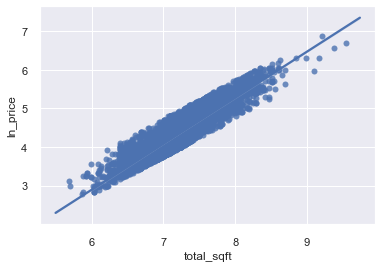

In [96]:
reg_plot(np.log(pune_House.total_sqft))

#### This seems to be a better fit hence transforming total sqft to logarithmic

In [97]:
pune_House.total_sqft=np.log(pune_House.total_sqft)

### Final Data before Dummies

In [98]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft,ln_price
1,4,Plot Area,Ready To Move,3.000,5.000,120.000,Ambegaon Budruk,7.863,4.787
2,3,Built-up Area,Ready To Move,3.000,2.000,62.000,Anandnagar,7.272,4.127
3,3,Super built-up Area,Ready To Move,1.000,3.000,95.000,Aundh,7.327,4.554
4,2,Super built-up Area,Ready To Move,1.000,2.000,51.000,Aundh,7.090,3.932
8,3,Super built-up Area,Ready To Move,1.000,3.000,63.250,Bhandarkar Road,7.178,4.147


In [99]:
print("Numner of rows are: {} | Number of columns are: {}".format(pune_House.shape[0],pune_House.shape[1]))

Numner of rows are: 8555 | Number of columns are: 9


### Editing the Variables

In [101]:
pune_House.bath=pune_House.bath.astype("int")

In [102]:
pune_House.site_location=pune_House.site_location.apply(lambda x: x.replace(" ","_"))

In [103]:
pune_House.area_type=pune_House.area_type.apply(lambda x: x.replace("-","_"))

In [104]:
pune_House.area_type=pune_House.area_type.apply(lambda x: x.replace(" ","_"))

In [105]:
pune_House.availability=pune_House.availability.apply(lambda x: x.replace(" ","_"))

In [106]:
pune_House.head()

,Size,area_type,availability,balcony,bath,price,site_location,total_sqft,ln_price
1,4,Plot__Area,Ready_To_Move,3.000,5,120.000,Ambegaon_Budruk,7.863,4.787
2,3,Built_up__Area,Ready_To_Move,3.000,2,62.000,Anandnagar,7.272,4.127
3,3,Super_built_up__Area,Ready_To_Move,1.000,3,95.000,Aundh,7.327,4.554
4,2,Super_built_up__Area,Ready_To_Move,1.000,2,51.000,Aundh,7.090,3.932
8,3,Super_built_up__Area,Ready_To_Move,1.000,3,63.250,Bhandarkar_Road,7.178,4.147


### Creating Dummies

In [107]:
final=pd.get_dummies(pune_House,columns=["area_type","site_location","availability","Size","bath"],drop_first=True)

In [108]:
final.head()

,balcony,price,total_sqft,ln_price,area_type_Carpet__Area,area_type_Plot__Area,area_type_Super_built_up__Area,site_location_Ambegaon_Budruk,site_location_Anandnagar,site_location_Aundh,...,Size_3,Size_4,Size_5,Size_6,bath_2,bath_3,bath_4,bath_5,bath_6,bath_7
1,3.000,120.000,7.863,4.787,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3.000,62.000,7.272,4.127,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,1.000,95.000,7.327,4.554,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1.000,51.000,7.090,3.932,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.000,63.250,7.178,4.147,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [110]:
print("Number of rows are: {} | Number of columns are: {}".format(final.shape[0],final.shape[1]))

Number of rows are: 8555 | Number of columns are: 119


### Checking Multicollinearity

In [112]:
#VIF:
feature=final.columns.difference(["ln_price","price"])
model_equation='ln_price ~'+ '+'.join(feature)
y,x=dmatrices(model_equation,final,return_type='dataframe')
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [113]:
vif.sort_values('VIF',ascending=False)

,Features,VIF
0,Intercept,1220.297
2,Size_3,26.956
1,Size_2,24.300
22,bath_2,20.910
23,bath_3,20.143
...,...,...
20,availability_Sep,1.269
11,availability_Feb,1.255
27,bath_7,1.200
6,area_type_Carpet__Area,1.053


### Removing Multicollinearity:

In [115]:
#VIF:
feature=final.columns.difference(["ln_price","price","Size_3","bath_3","availability_Ready_To_Move"])
model_equation='ln_price ~'+ '+'.join(feature)
y,x=dmatrices(model_equation,final,return_type='dataframe')
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [117]:
vif.sort_values('VIF',ascending=False)

,Features,VIF
0,Intercept,828.527
63,site_location_Kondhwa,3.758
29,site_location_Baner,3.019
61,site_location_Khadaki,2.972
27,site_location_Aundh,2.971
...,...,...
11,availability_Jan,1.020
12,availability_Jul,1.019
16,availability_Nov,1.018
18,availability_Sep,1.017


### Split the data into Train and Test

In [118]:
train_X,test_X,train_Y,test_Y=train_test_split(final.loc[:,final.columns.difference(["ln_price","price","Size_3","bath_3","availability_Ready_To_Move"])],final.ln_price,random_state=0)

In [119]:
print("Number of rows in Train are: {} | Number of rows in Test are: {}".format(train_X.shape[0],test_X.shape[0]))

Number of rows in Train are: 6416 | Number of rows in Test are: 2139


### Linear Regression Model

In [120]:
model=LinearRegression(normalize=True)

In [121]:
model.fit(train_X,train_Y)

LinearRegression(normalize=True)

### R Squared - Train

In [122]:
print("The R Squared for Train Data is:",np.round(model.score(train_X,train_Y),3))

The R Squared for Train Data is: 0.808


### R Squared - Test

In [123]:
print("The R Squared for Test Data is:",np.round(model.score(test_X,test_Y),3))

The R Squared for Test Data is: 0.806


### Metrics: MAPE & RMSE

#### RMSE for Intercept only model - Train

In [124]:
avg=np.mean(np.exp(train_Y))
s=pd.Series(avg)
pred_train=np.exp(model.predict(train_X))

In [125]:
y_true_Base_Model=s.repeat(repeats=len(train_X))

In [126]:
RMSE_Base_Model=mean_squared_error(y_true=y_true_Base_Model,y_pred=pred_train)

In [127]:
print("RMSE for Intercept Only Model for Train Data Set is: ",np.round(np.sqrt(RMSE_Base_Model),3))

RMSE for Intercept Only Model for Train Data Set is:  49.608


#### RMSE for Full model - Train

In [128]:
y_true_Full_Model=train_Y

In [129]:
RMSE_Full_Model=mean_squared_error(y_true=np.exp(train_Y),y_pred=pred_train)

In [130]:
print("RMSE for Full Model is: ",np.round(np.sqrt(RMSE_Full_Model),3))

RMSE for Full Model is:  22.616


#### RMSE for Intercept only model - Test

In [131]:
avg=np.mean(np.exp(test_Y))
s=pd.Series(avg)
pred_test=np.exp(model.predict(test_X))

In [132]:
y_true_Base_Model=s.repeat(repeats=len(test_X))

In [133]:
RMSE_Base_Model=mean_squared_error(y_true=y_true_Base_Model,y_pred=pred_test)

In [134]:
print("RMSE for Intercept Only Model for Test Data Set is: ",np.round(np.sqrt(RMSE_Base_Model),3))

RMSE for Intercept Only Model for Test Data Set is:  56.931


#### RMSE for Full model - Test

In [135]:
y_true_Full_Model=test_Y

In [136]:
RMSE_Full_Model=mean_squared_error(y_true=np.exp(test_Y),y_pred=pred_test)

In [137]:
print("RMSE for Full Model for Test Data Set is: ",np.round(np.sqrt(RMSE_Full_Model),3))

RMSE for Full Model for Test Data Set is:  26.715


#### MAPE for Full Model - Train

In [138]:
print("MAPE for Train Data Set with Full Model is",np.round(np.mean(np.abs((np.exp(train_Y)-pred_train)/pred_train)),3))

MAPE for Train Data Set with Full Model is 0.178


#### MAPE for Full Model - Test

In [139]:
print("MAPE for Test Data Set with Full Model is",np.round(np.mean(np.abs((np.exp(test_Y)-pred_test)/pred_test)),3))

MAPE for Test Data Set with Full Model is 0.176


### Assumptions Check 

#### 1.Residual Plot

In [143]:
from yellowbrick.regressor import ResidualsPlot

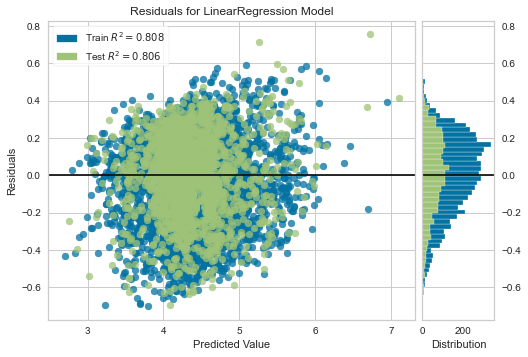

In [160]:
visualizer=ResidualsPlot(model)
visualizer.fit(train_X, train_Y)  
visualizer.score(test_X, test_Y)  
visualizer.show()                 

#### Observations:
- Errors are randomly and normally distributed 
- There is no pattern with predicted values so it follows homoscedasticity

#### 2.No Multicollinearity

In [167]:
#VIF:
feature=train_X.columns
model_equation='ln_price ~'+ '+'.join(feature)
y,x=dmatrices(model_equation,final,return_type='dataframe')
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [172]:
vif.sort_values('VIF',ascending=False).head()

,Features,VIF
0,Intercept,828.527
63,site_location_Kondhwa,3.758
29,site_location_Baner,3.019
61,site_location_Khadaki,2.972
27,site_location_Aundh,2.971
